# Analyzing the Lending Club Case Study

#### Importing the Libraries required for EDA

In [891]:
#import the required Libararies
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns

#adjusting the rows and columns display
pd.set_option('display.max_columns',111)
pd.set_option('display.max_rows',111)


#### 1. Reading the Input Data from the File 

In [892]:
#Reading the loan data in pandas
file_path = 'C:/Users/SRSRE/OneDrive - KK-Group/1.Working Files/Desktop/Loan DataSet/loan.csv'
loan_df = pd.read_csv(file_path, low_memory = False, parse_dates = ["issue_d"])
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,2011-01-12,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,2011-01-12,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,2011-01-12,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,2011-01-12,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

#### 2. Understanding structure of the Data

In [893]:
#getting the dataframe dimensions
loan_df.shape

(39717, 111)

In [894]:
#getting the column informations
loan_df.dtypes

id                                         int64
member_id                                  int64
loan_amnt                                  int64
funded_amnt                                int64
funded_amnt_inv                          float64
term                                      object
int_rate                                  object
installment                              float64
grade                                     object
sub_grade                                 object
emp_title                                 object
emp_length                                object
home_ownership                            object
annual_inc                                 int64
verification_status                       object
issue_d                           datetime64[ns]
loan_status                               object
pymnt_plan                                object
url                                       object
desc                                      object
purpose             

In [895]:
#basic info of the data frame
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: datetime64[ns](1), float64(73), int64(14), object(23)
memory usage: 33.6+ MB


In [896]:
#Getting basic statistical details of the data frame
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

#### 3. Data Quality Check and Missing Values

#### 3.1 Percentage of missing values for columns and rows

In [897]:
cols = pd.DataFrame(loan_df.isnull().mean().round(4) * 100, columns = ['percentage_missing_value']).sort_values(by=['percentage_missing_value'])
print(cols)

                                percentage_missing_value
id                                                  0.00
earliest_cr_line                                    0.00
inq_last_6mths                                      0.00
open_acc                                            0.00
pub_rec                                             0.00
revol_bal                                           0.00
total_acc                                           0.00
initial_list_status                                 0.00
out_prncp                                           0.00
out_prncp_inv                                       0.00
delinq_2yrs                                         0.00
total_pymnt                                         0.00
total_rec_int                                       0.00
total_rec_late_fee                                  0.00
recoveries                                          0.00
collection_recovery_fee                             0.00
last_pymnt_amnt                

In [898]:
#summary of missing values associated with columns
print(str(round(100.0 * cols[cols['percentage_missing_value']==0].count()/len(cols),2))+ "% " +"columns have no missing value")
print(str(round(100.0 * cols[(cols['percentage_missing_value']>0) & (cols['percentage_missing_value']<=10)].count()/len(cols),2))+ "% " +"columns have missing value betwee 0-10%")
print(str(round(100.0 * cols[(cols['percentage_missing_value']>10) & (cols['percentage_missing_value']<=50)].count()/len(cols),2))+ "% " +"columns have missing value betwee 10-50%")
print(str(round(100.0 * cols[cols['percentage_missing_value']>50].count()/len(cols),2))+"% "+"columns have more than 50% missing value") 

percentage_missing_value    38.74
dtype: float64% columns have no missing value
percentage_missing_value    9.01
dtype: float64% columns have missing value betwee 0-10%
percentage_missing_value    0.9
dtype: float64% columns have missing value betwee 10-50%
percentage_missing_value    51.35
dtype: float64% columns have more than 50% missing value


In [899]:
#checking row-wise null percentages
row_null = pd.DataFrame(loan_df.isnull().sum(axis =1),columns = ['num_missing_value'])
row_null

,num_missing_value
0,58
1,57
2,59
3,56
4,55
...,...
39712,59
39713,59
39714,61
39715,61


#### 3.2 Removing the columns with high percentage of missing values (>50%)

In [900]:
#removing columns where we have >50% of the values are null
threshold = 0.5
percentage_null_values = (loan_df.isnull().mean() * 100).round(2)
columns_to_remove = percentage_null_values[percentage_null_values > threshold].index.tolist()
loan_df = loan_df.drop(columns=columns_to_remove)


In [901]:
#checking the datafrme again afer removing the columns where >50% the values are null
null_values_per_column = loan_df.isnull().sum()
print(null_values_per_column)

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
url                            0
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc                      0
initial_li

In [902]:
#getting the dataframe dimensions after removing columns with >90% values are null
loan_df.shape

(39717, 50)

In [903]:
# re-checking columns with missing
round(100.0 * loan_df.isnull().sum()/len(loan_df),2).sort_values()

id                            0.00
delinq_amnt                   0.00
open_acc                      0.00
pub_rec                       0.00
revol_bal                     0.00
total_acc                     0.00
initial_list_status           0.00
out_prncp                     0.00
out_prncp_inv                 0.00
total_pymnt                   0.00
total_pymnt_inv               0.00
total_rec_prncp               0.00
total_rec_int                 0.00
total_rec_late_fee            0.00
recoveries                    0.00
collection_recovery_fee       0.00
last_pymnt_amnt               0.00
policy_code                   0.00
application_type              0.00
acc_now_delinq                0.00
earliest_cr_line              0.00
delinq_2yrs                   0.00
inq_last_6mths                0.00
addr_state                    0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                

#### 3.3 Subsetting the data to filter only the defaulters data

In [904]:
#creatting subset of the data for only defualted customers for further steps
loan_df_Chargedoff = loan_df[loan_df['loan_status'] == 'Charged Off']

In [905]:
#getting the dataframe dimensions after subsetting the data to only the defaulters
loan_df_Chargedoff.shape

(5627, 50)

In [906]:
#getting the column informations
loan_df_Chargedoff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5627 entries, 1 to 39688
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          5627 non-null   int64         
 1   member_id                   5627 non-null   int64         
 2   loan_amnt                   5627 non-null   int64         
 3   funded_amnt                 5627 non-null   int64         
 4   funded_amnt_inv             5627 non-null   float64       
 5   term                        5627 non-null   object        
 6   int_rate                    5627 non-null   object        
 7   installment                 5627 non-null   float64       
 8   grade                       5627 non-null   object        
 9   sub_grade                   5627 non-null   object        
 10  home_ownership              5627 non-null   object        
 11  annual_inc                  5627 non-null   int64      

In [907]:
#Creating the list of Categorical Columns
Categorical_columns = ['term','grade','sub_grade','home_ownership',
                       'purpose','addr_state']

In [908]:
#Creating the list of numerical columns
Numerical_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','annual_inc','dti','delinq_2yrs',
                    'open_acc','pub_rec','revol_bal','total_acc','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee'
                    ,'recoveries','collection_recovery_fee','last_pymnt_amnt']

### 4 Univariate Analysis

#### Under univariate analysis, we will look at the percentage of distribution of values of categorical variable

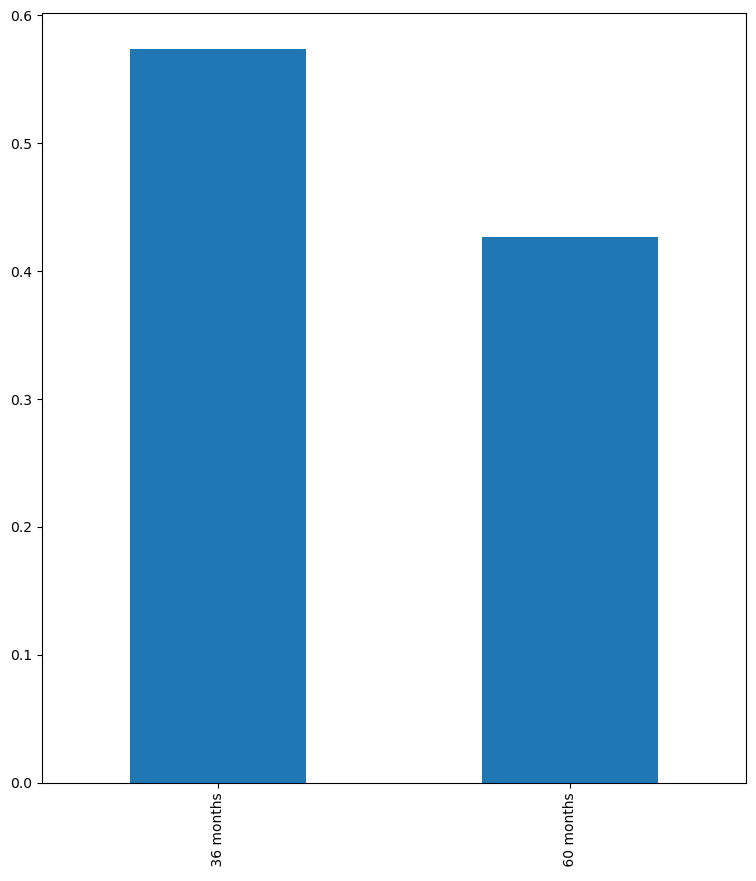

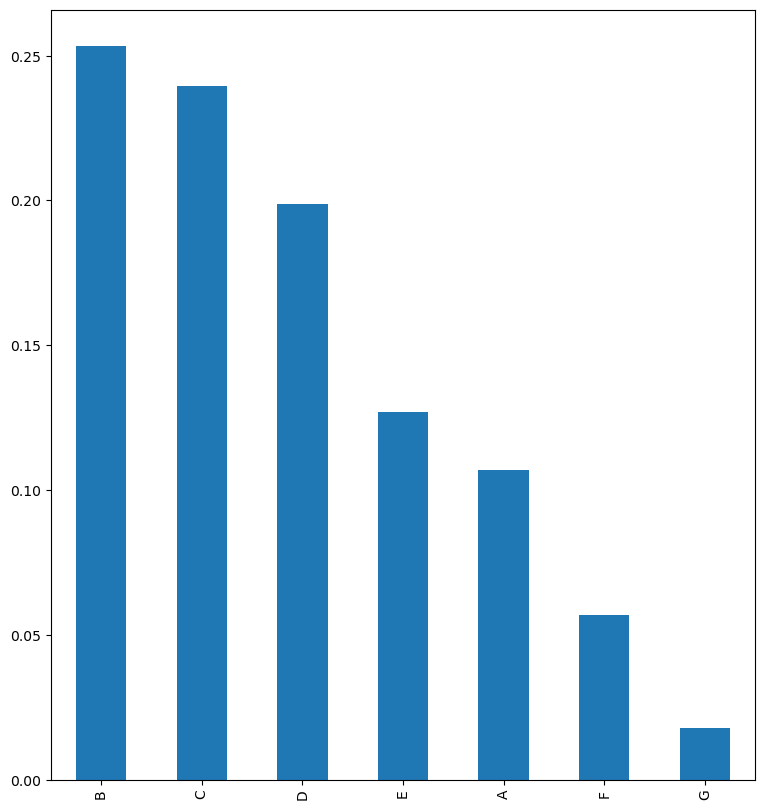

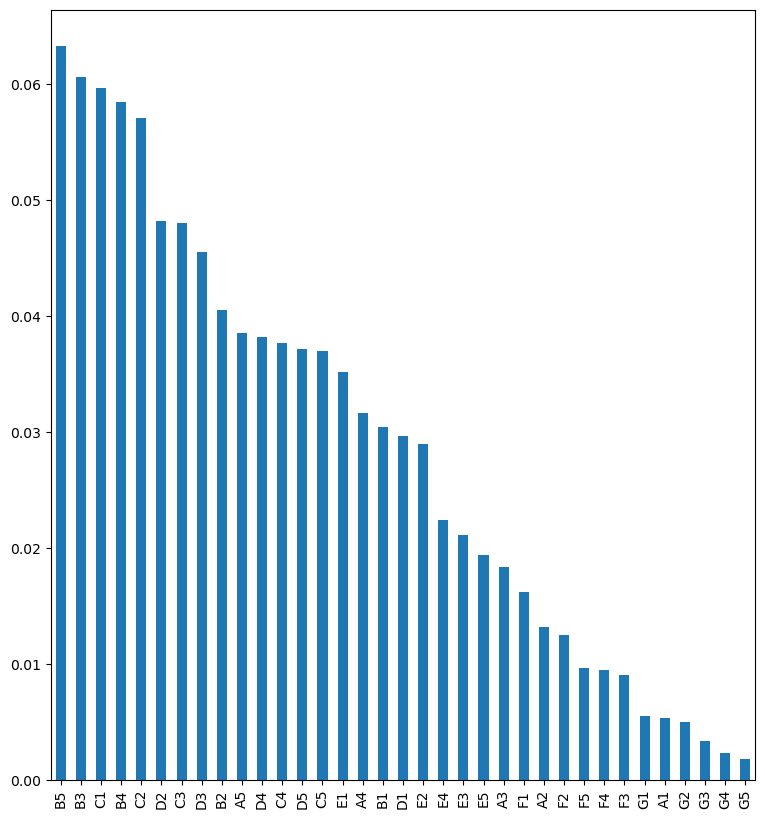

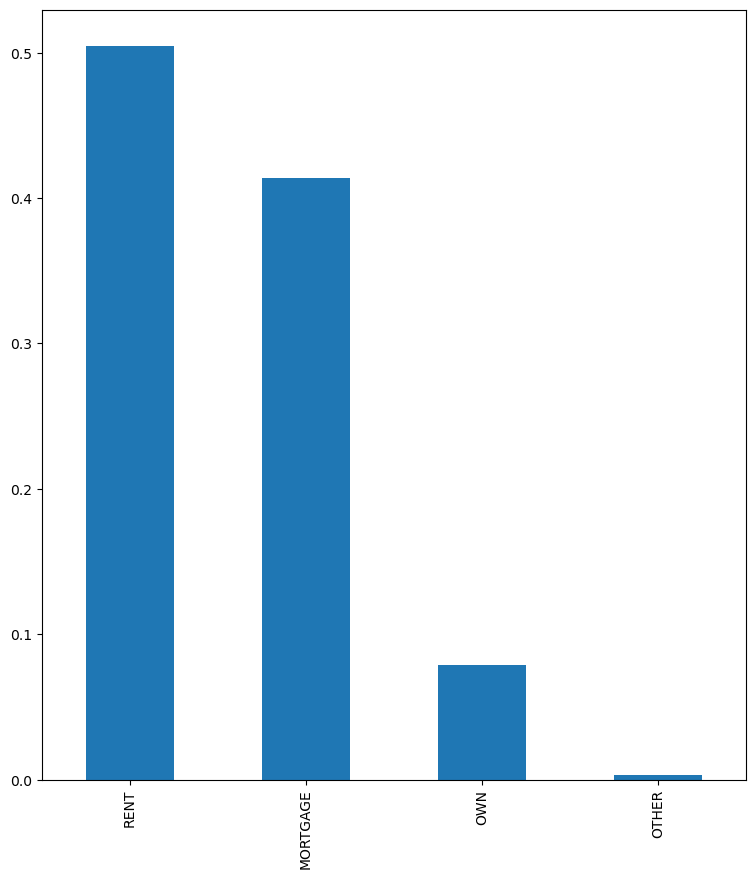

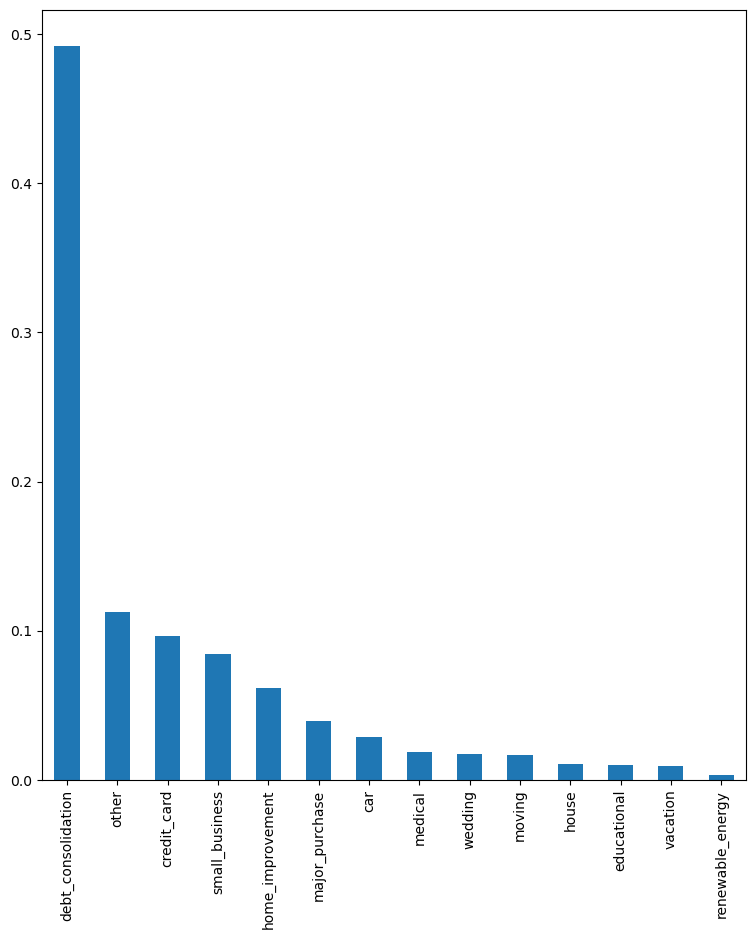

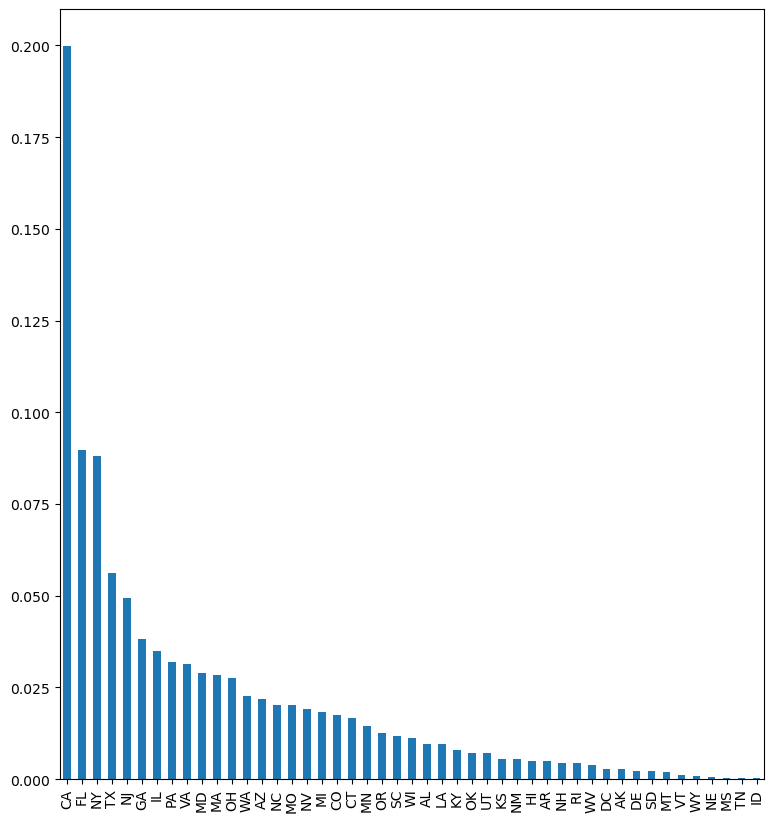

In [909]:
for i in Categorical_columns :
    plt.figure(figsize = (20,10))
    plt.subplot(1,2,1)
    loan_df_Chargedoff[i].value_counts(normalize = True).plot.bar()


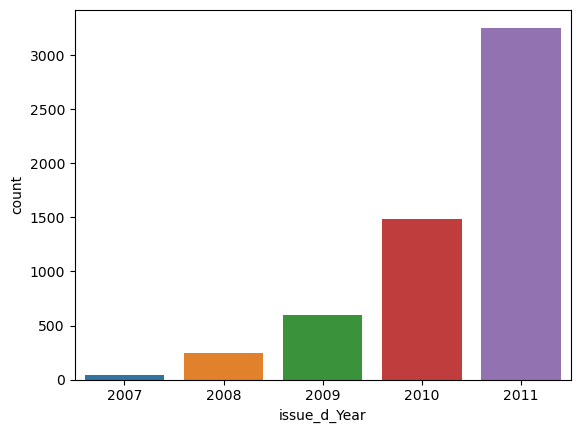

In [910]:
#converting issue_d to a date datatype
loan_df_Chargedoff["issue_d"] = pd.to_datetime(loan_df_Chargedoff["issue_d"])

#creating a new year derived column to see year on year defaulters trend
loan_df_Chargedoff["issue_d_Year"]= loan_df_Chargedoff["issue_d"] .dt.year

#creating a plot to see the Year on Year trend on the defaulters
sns.countplot(data = loan_df_Chargedoff, x ="issue_d_Year")
plt.show()

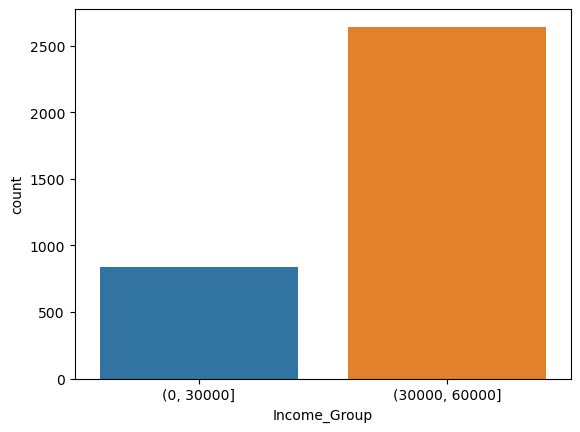

In [911]:
#creating a derived column to grouop the income groups
bins = [0,30000,60000]
lables = ['<30000','>30000',float('inf')]
loan_df_Chargedoff["Income_Group"] = pd.cut(loan_df_Chargedoff["annual_inc"], bins=bins)

#creating a countplot to visulize the income group defaulters
sns.countplot(data = loan_df_Chargedoff, x ="Income_Group")
plt.show()

#### Key Interpretation from univariate analysis of categorical variables

##### Important observations

    1. term : Loans with a 36-month term have a higher default rate compared to those with a 60-month term.
    2. Grade : Loans with grades B, C, and D have a higher default rate compared to loans with other grades.
    3. sub_grade : The top 5 subgrades with the highest default rates are B5, B3, C1, B4, and C2.
    4. home_ownership : Borrowers who own their homes have a lower default rate compared to those who do not own a home.
    5. purpose : Loans taken for the purpose of debt consolidation have the highest default rate.
    6. state : The state CA has the highest number of defaulters among all states.
    7. issue_d : The number of defaulters has been steadily increasing from year to year.
    8. income : Individuals earning more than 30,000 are more inclined to default on their loans compared to those earning less than 30,000

#### Correlation for numerical columns

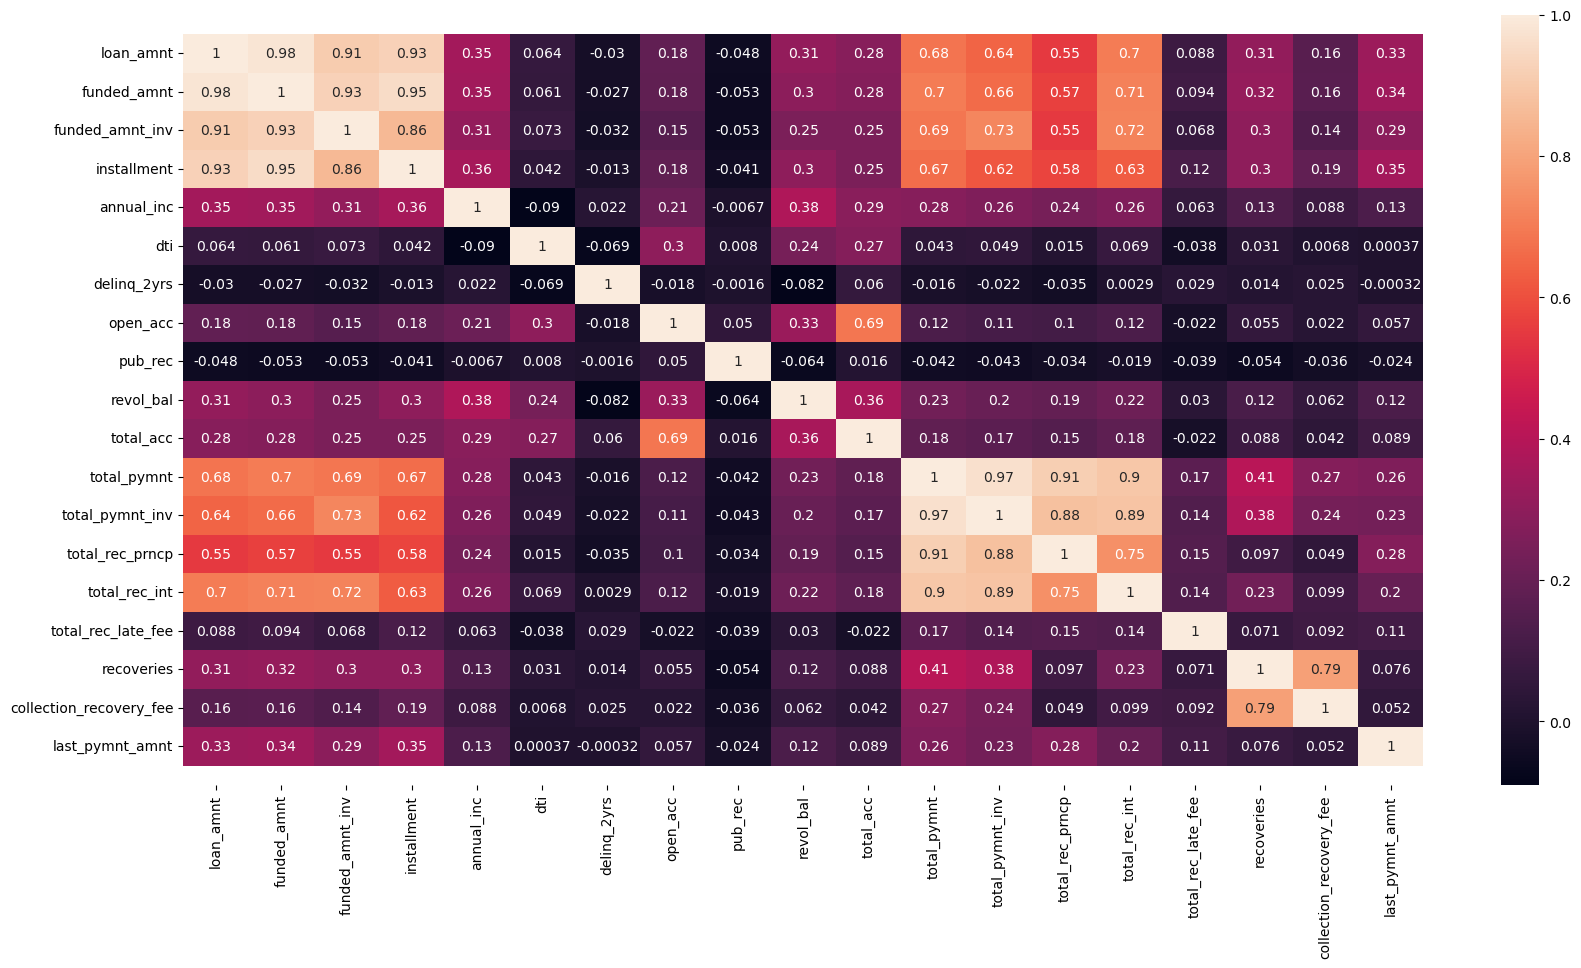

In [912]:
plt.figure(figsize = (20,10))
sns.heatmap(loan_df_Chargedoff[Numerical_columns].corr(),annot = True)
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.yticks(rotation = 0)
plt.show()

#### Important observations

    1. loan_amnt, funded_amnt, funded_amnt_inv& installment columns are highly correalted
    2. total_pymmnt, total_payment_inv,total_rec_prncp,total_rec_int are moderatly correlated to point 1 columns
    3. for the further analysis we could reduce the features which are highly correlated
